In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [14]:
load_breast_cancer().target

(569,)

In [50]:
somedata = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)


In [21]:
somedata = somedata.corr()

<Axes: >

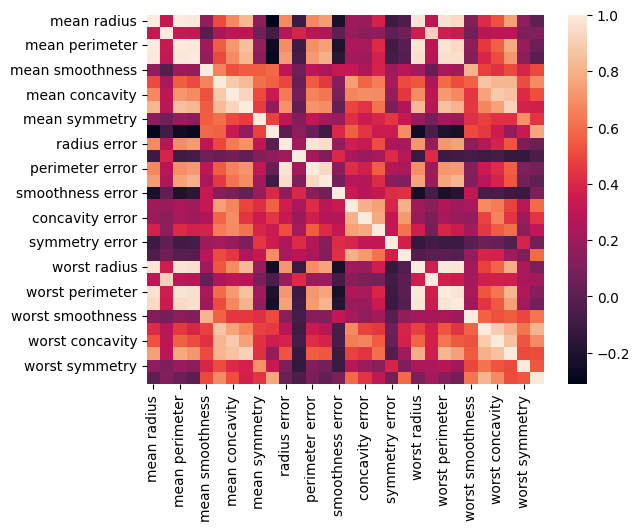

In [23]:
sns.heatmap(somedata)

In [15]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [40]:
sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [18]:
sel_.get_support()

array([False,  True, False, False, False, False, False,  True,  True,
       False,  True, False, False, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

In [41]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]

In [42]:
removed_feats

Index(['mean radius', 'mean perimeter', 'mean area', 'mean smoothness',
       'mean compactness', 'mean concavity', 'mean fractal dimension',
       'texture error', 'perimeter error', 'area error', 'smoothness error',
       'concavity error', 'concave points error', 'symmetry error',
       'worst compactness', 'worst fractal dimension'],
      dtype='object')

In [28]:
data = breast_cancer
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [30]:
somedata.drop(removed_feats.values, axis=1, inplace=True)

In [31]:
somedata_corr = somedata.corr()

<Axes: >

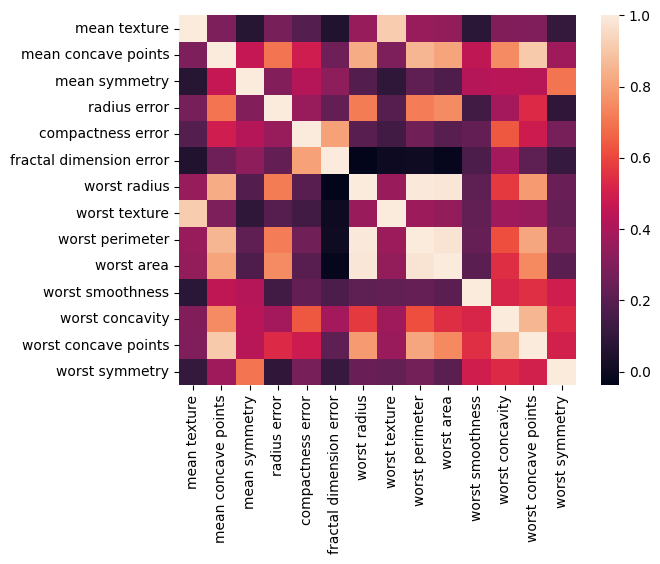

In [32]:
sns.heatmap(somedata_corr)

In [33]:
X_train_selected = sel_.transform(scaler.transform(X_train))
X_test_selected = sel_.transform(scaler.transform(X_test))

In [43]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [53]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [45]:
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=10))

In [46]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [48]:
sel_.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype=object)

In [49]:
X_train_selected = sel_.transform(scaler.transform(X_train))
X_test_selected = sel_.transform(scaler.transform(X_test))

In [54]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [58]:
scaler.fit(X_train)

StandardScaler()

In [59]:
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=10))

In [60]:
sel_.get_support()

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True])

In [61]:
sel_.get_feature_names_out()

array(['x1', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x23', 'x24', 'x26', 'x27', 'x29'], dtype=object)

In [62]:
somedata

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [66]:
somedata.columns[sel_.get_support()]

Index(['mean texture', 'mean area', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst fractal dimension'],
      dtype='object')

In [67]:
newdata = pd.read_table('GSE117063_non-normalized_data.txt')

In [73]:
newdata.set_index('ID_ref', inplace=True)

In [83]:
newdata.T.rename_axis('deb')

ID_ref,hsa-miR-652-3p,hsa-miR-181a-5p,hsa-miR-221-3p,hsa-let-7f-5p,hsa-miR-27b-3p,hsa-miR-374b-5p,hsa-miR-93-5p,hsa-miR-200a-3p,hsa-miR-484,hsa-miR-106a-5p,...,hsa-miR-182-5p,hsa-miR-15b-5p,hsa-miR-106b-3p,hsa-miR-29c-3p,hsa-miR-95,hsa-miR-21-5p,hsa-miR-30e-3p,hsa-miR-543,hsa-miR-29b-2-5p,hsa-miR-495-3p
deb,,,,,,,,,,,,,,,,,,,,,
Control 1,31.12,31.44,29.16,31.77,32.04,35.45,28.87,40.18,31.22,29.20,...,40.21,31.84,35.09,32.81,36.70,28.87,34.93,36.12,36.69,35.86
Control 2,33.60,33.56,31.15,34.01,32.63,39.99,29.07,42.00,32.27,30.23,...,37.13,32.17,42.00,33.56,36.39,28.76,38.66,37.86,35.41,38.33
Control 3,32.01,33.41,30.99,33.74,31.94,35.07,29.80,40.06,32.33,29.86,...,38.18,31.97,39.93,31.87,37.38,27.85,36.99,35.94,39.93,37.02
Control 4,32.08,32.59,30.52,33.24,31.63,35.55,28.79,40.06,31.41,29.61,...,36.73,32.23,40.43,31.38,36.78,27.92,37.14,40.43,36.49,37.11
Control 5,30.39,30.21,27.25,30.43,30.49,32.59,27.90,39.68,30.39,27.65,...,37.50,31.12,35.61,31.60,36.80,27.41,34.59,33.57,34.62,32.75
Control 6,31.50,31.85,29.38,32.67,31.87,35.15,29.66,34.53,31.64,29.51,...,42.00,32.70,36.69,32.06,42.00,27.97,37.75,35.10,35.60,35.72
Control 7,31.36,31.67,29.62,32.29,31.29,35.05,29.24,42.00,31.60,29.67,...,36.82,31.45,40.48,31.17,36.27,27.55,35.10,37.02,37.12,36.36
Control 8,31.20,31.92,29.36,33.72,32.34,35.97,28.07,42.00,31.34,28.75,...,42.00,32.02,37.64,32.07,40.30,28.39,38.02,36.37,36.44,35.37
Control 9,32.74,32.82,30.82,33.73,32.03,35.57,29.66,39.85,32.64,30.05,...,42.00,40.17,42.00,33.23,42.00,28.96,36.19,36.88,36.20,36.23
